In [5]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


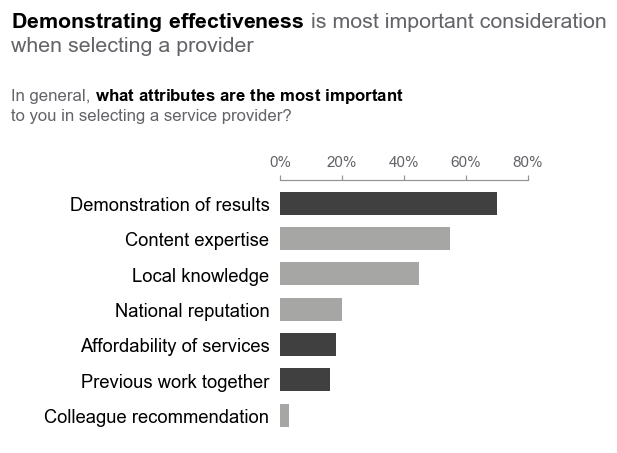

In [8]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# survey responses
X = ['Colleague recommendation', 'Previous work together', 'Affordability of services',
     'National reputation', 'Local knowledge', 'Content expertise', 'Demonstration of results']
Y = [3, 16, 18, 20, 45, 55, 70] # responses distribution

# Bobmay (0, 3, 4, 5 responses)
color_gray2 = '#A6A6A5'
# Charcoal (1, 2, 6 responses)
color_gray3 = '#414040'
# Dim gray for light text
color_gray4 = '#646369'

# create new figure
fig, ax1 = plt.subplots(figsize=(9, 5), # width, height in inches 
                        dpi=110)        # resolution of the figure

fig.subplots_adjust(left=0.28, 
                    right=0.53, 
                    top=0.66, 
                    bottom=0.19)

# matplotlib doesn't have a function for drawing text with 
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas
    
    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i+1)*spacing, units='dots')
        
# titile the plot
rainbow_text(-87, 10.3, 
             '$\\bf{Demonstrating\ effectiveness}$|| is most important consideration\n'
             'when selecting a provider',
             [['black', color_gray4], [color_gray4]],
             spacing=24,
             ax=ax1,
             fontsize=14)

# add survey question
rainbow_text(-87, 8.35, 
         'In general, ||$\\bf{what\ attributes\ are\ the\ most\ important}$\n'
         'to you in selecting a service provider?', 
         [[color_gray4, 'black'], [color_gray4]],
         spacing=20,
         ax=ax1,
         fontsize=11)


ax1.set_xlim([0, 80])
plt.setp(ax1, 
         xticks=[0, 20, 40, 60, 80], 
         xticklabels=['0%', '20%', '40%', '60%', '80%'],
         yticks=np.arange(len(X)), 
         yticklabels=X)

for i, item in enumerate(ax1.get_yticklabels()):
    item.set_fontsize(12)   

ax1.tick_params(top='on', 
                bottom='off', 
                left='off', 
                right='off', 
                labelleft='on', 
                labelbottom='off',
                labeltop='on')
for i, item in enumerate(ax1.get_xticklabels()):
    item.set_color('#646369')   
    
ax1.tick_params(color='#929497')
ax1.spines['top'].set_color('#929497')
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

bars = ax1.barh(range(len(X)), 
                Y, 
                height=0.65, 
                color=[color_gray2] + [color_gray3]*2 + [color_gray2]*3 + [color_gray3])

